In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('result_CV_5_50x.txt')

In [3]:
import matplotlib.font_manager as fm
fonts = fm.findSystemFonts()
for font in fonts:
    #print(font)
    if font == '/usr/share/fonts/truetype/Helvetica.ttf':
        print('ok')

ok


In [4]:
Y = data['r2'].to_numpy()
X = [x+1 for x in range(50)]

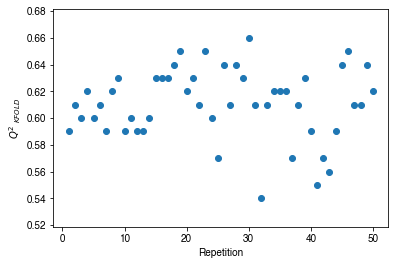

In [5]:
#font = {'family': 'Times New Roman', 'size': 20}
font = {'family': 'Helvetica', 'size': 10}

# Configura a fonte global para o gráfico
plt.rc('font', **font)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = ['Helvetica']

fig, ax = plt.subplots()

ax.scatter(X, Y)

plt.ylabel("$Q^2$ $_{KFOLD}$")
plt.xlabel("Repetition")

plt.savefig('result_CV_5_50x_DPI.png', dpi=300)

#plt.title(f'K-Fold Cross Validation (K=5) - Repetided 50 times')

In [6]:
data2 = pd.read_csv('result_Y_Scrambling_50x.csv')

In [7]:
emb = data2['Embaralhado'].to_numpy()
norm = data2[' Normal'].to_numpy()

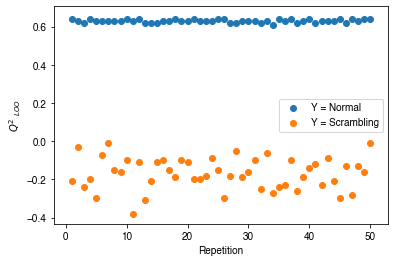

In [8]:
X = [x+1 for x in range(50)]

fig, ax = plt.subplots()

ax.scatter(X, norm, label = 'Y = Normal')

ax.scatter(X, emb, label='Y = Scrambling')

plt.rc('font', **font)

plt.ylabel("$Q^2$ $_{LOO}$")
plt.xlabel("Repetition")

#plt.title(f'Leave One Out - Repetided 50 times')

ax.legend()

plt.savefig('result_Y_Scrambling_50x_DPI.png', dpi=300)

0.639146607719139


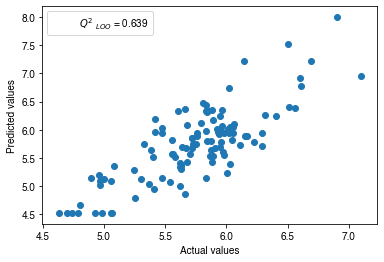

In [9]:
df_avok = pd.read_csv('result_LOO.csv')

L   = df_avok['L']
L_Y = df_avok['L_Y']

from scipy import stats
from sklearn.metrics import r2_score

r = stats.pearsonr(L_Y, L)[0]
r2 = r2_score(L_Y, L)

print(r2)

y = [0 if y <=5 else 1 for y in L_Y]

fig, ax = plt.subplots()

ax.scatter(L, L_Y)

ax.plot([], [], " ", label="$Q^2$ $_{LOO}$ = 0.639")

Z = np.arange(4.5, 8, 0.1)

#ax.scatter(Z, Z)

plt.rc('font', **font)

plt.xlabel("Actual values")
plt.ylabel("Predicted values")

#plt.title(f'Leave One Out')

ax.legend(loc="upper left")

plt.savefig('result_LOO_DPI.png', dpi=300)

In [10]:
df_Inimp = pd.read_csv('inputImportance.csv')

name  = df_Inimp['var']
gain  = df_Inimp['imp']

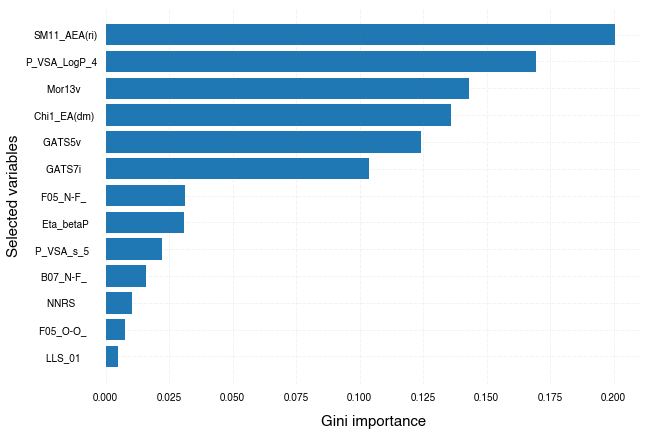

In [11]:
fig, ax = plt.subplots(figsize =(9, 6)) #figsize =(32, 18)

font = {'family': 'Helvetica', 'size': 10}
# Horizontal Bar Plot
ax.barh(name, gain)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

plt.subplots_adjust(top=0.999, right=0.99, left=0.165)

# Add Plot Title
#ax.set_title('Titulo do grafico', loc ='left', )
plt.rc('font', **font)
# Add Legend


plt.xlabel("Gini importance", fontsize=15, labelpad=12)
plt.ylabel("Selected variables", fontsize=15)

plt.savefig('inputImportance_DPI.png', dpi=300)

# Show Plot
plt.show()

